In [3]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms


# Define variables
batch_size = 64
num_classes = 10
learning_rate = 0.001
num_epochs = 10

# Device will determine wether to run the training on GPU or CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [5]:
train_dataset = torchvision.datasets.MNIST(root = './data',
                                            train = True,
                                            transform = transforms.Compose([
                                                transforms.Resize((32,32)),
                                                transforms.ToTensor(),
                                                transforms.Normalize(mean = (0.1307,), std = (0.3081,))]),
                                            download = True)

test_dataset = torchvision.datasets.MNIST(root = './data',
                                          train = False,
                                          transform = transforms.Compose([
                                                  transforms.Resize((32,32)),
                                                  transforms.ToTensor(),
                                                  transforms.Normalize(mean = (0.1325,), std = (0.3105,))]),
                                          download=True)


train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)


test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)

In [6]:
# Define the CNN

class LeNet(nn.Module):
  def __init__(self, num_classes):
    super(LeNet, self).__init__()
    self.layer1 = nn.Sequential(
        nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=0),
        nn.BatchNorm2d(6),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.layer2 = nn.Sequential(
        nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0),
        nn.BatchNorm2d(16),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.fc = nn.Linear(400, 120)
    self.relu = nn.ReLU()
    self.fc1 = nn.Linear(120, 84)
    self.relu1 = nn.ReLU()
    self.fc2 = nn.Linear(84, num_classes)

  def forward(self, x):
    out = self.layer1(x)
    out = self.layer2(out)
    out = out.reshape(out.size(0), -1)
    out = self.fc(out)
    out = self.relu(out)
    out = self.fc1(out)
    out = self.relu1(out)
    out = self.fc2(out)
    return out



In [7]:
model = LeNet(num_classes).to(device)

# Loss function
cost = nn.CrossEntropyLoss()

# Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Print steps
total_step = len(train_loader)

In [8]:
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = cost(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 400 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
        		           .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/10], Step [400/938], Loss: 0.1076
Epoch [1/10], Step [800/938], Loss: 0.0823
Epoch [2/10], Step [400/938], Loss: 0.0147
Epoch [2/10], Step [800/938], Loss: 0.0033
Epoch [3/10], Step [400/938], Loss: 0.0308
Epoch [3/10], Step [800/938], Loss: 0.0115


In [ ]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)

with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))


Accuracy of the network on the 10000 test images: 99.12 %


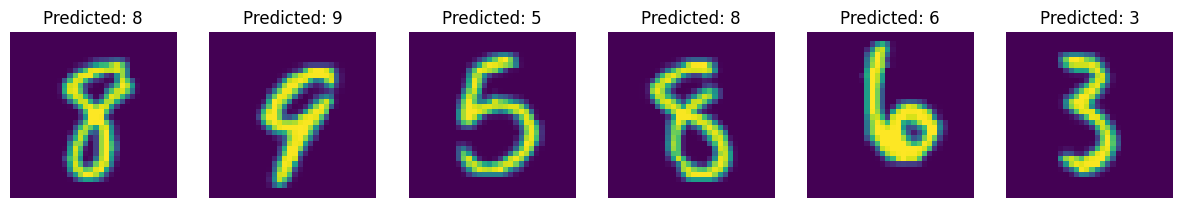

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Function to show images along with their labels in a row
def imshow_row(images, titles):
    fig, axs = plt.subplots(1, len(images), figsize=(15, 3))
    for i in range(len(images)):
        axs[i].imshow(images[i] / 2 + 0.5)
        axs[i].set_title(titles[i])
        axs[i].axis('off')
    plt.show()

# Get random test images
num_samples = 6
random_indices = random.sample(range(len(test_dataset)), num_samples)

# Prepare images and titles for display
images_to_show = []
titles_to_show = []

for idx in random_indices:
    image, label = test_dataset[idx]
    images_to_show.append(np.transpose(image.numpy(), (1, 2, 0)))
    titles_to_show.append(f"Predicted: {label}")

# Display the images in a row
imshow_row(images_to_show, titles_to_show)